# Project 01: Color-Based Object Detection
## using HSV color map

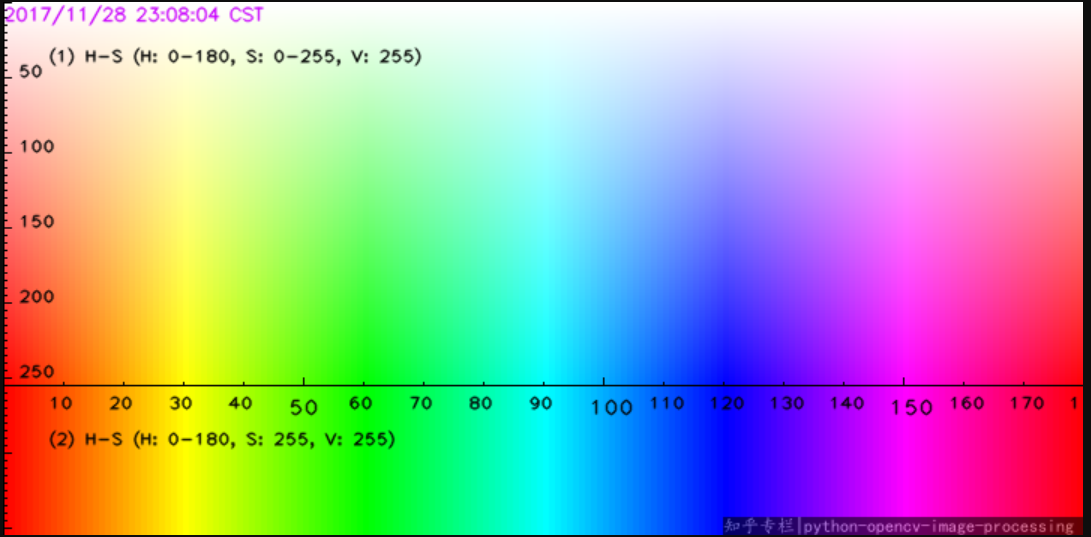

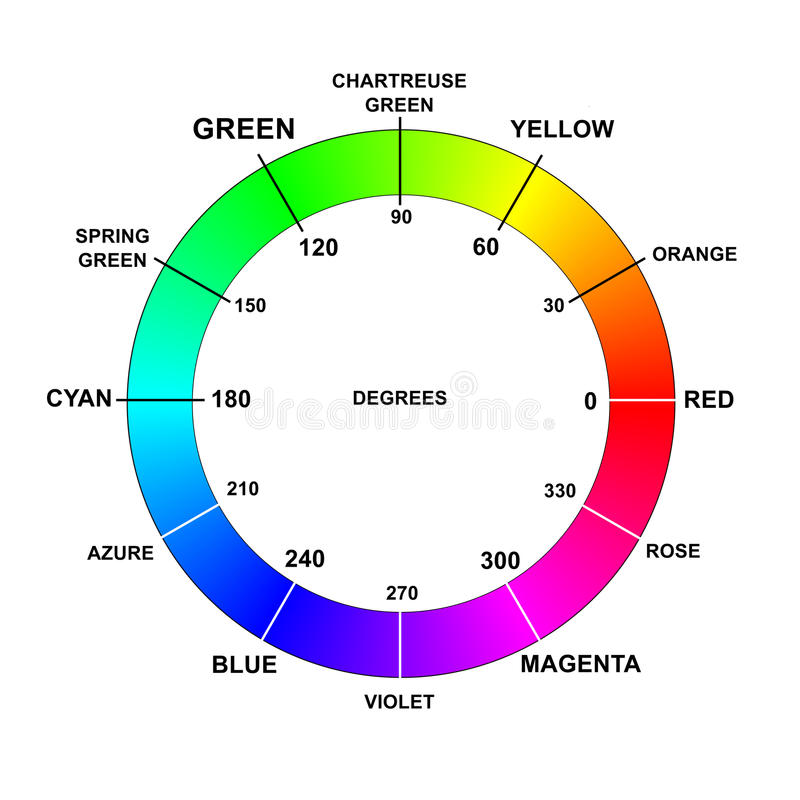

- the reason behind  using HSV color map for object detection because  `HSV` is easier to represent color ranges compared to `BGR`.

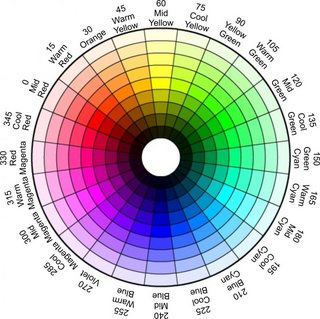

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt # type: ignore
import cv2 as cv

# Load an image or video for testing
image = cv.imread('traffic_lights.jpg')


'''-----------------------------------------------------------------------------------------------------'''
def detect_redSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    '''
    lower_bound1 = np.array([0, 100, 100])
    upper_bound1 = np.array([10, 255, 255])
    lower_bound2 = np.array([160, 100, 100])
    upper_bound2 = np.array([180, 255, 255])
    '''
    lower_bound = np.array([160, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([180, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    '''
    # Create masks
    red_mask1 = cv.inRange(hsv_image, lower_bound1, upper_bound1)
    red_mask2 = cv.inRange(hsv_image, lower_bound2, upper_bound2)
    # Combine red masks
    mask = cv.bitwise_or(red_mask1, red_mask2)
    '''
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the firstmasked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 0, 255),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="RED",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 0, 255),
            thickness=3
        )
    else:
        print("Red Color Is Not Detected")
        
        '''-----------------------------------------------------------------------------------------------------'''
        
def detect_yellowSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([12, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([40, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the first masked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 255, 255),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="YELLOW",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 255, 255),
            thickness=3
        )
    else:
        print("yellow Color Is Not Detected")

    '''-----------------------------------------------------------------------------------------------------'''
def detect_greenSignal(image):
    # Convert the image from BGR to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define color range for detection (e.g., detecting red objects)
    lower_bound = np.array([40, 100, 100]) # [0, 100, 100]
    upper_bound = np.array([90, 255, 255])

    # Create a mask to extract the object based on the color range
    mask = cv.inRange(hsv_image, lower_bound, upper_bound)
    
    # Bitwise-AND mask and original image to get the detected object
    detected_object = cv.bitwise_and(image, image, mask=mask)
    
    # apply mediam Blur for more refinement
    mask_median_blur= cv.medianBlur(
        src=mask,
        ksize=29
    )
    
    # Apply contours
    contours, _  = cv.findContours(
        image=mask_median_blur,
        mode=cv.RETR_EXTERNAL,
        method=cv.CHAIN_APPROX_SIMPLE
    )
    
    # if contour available
    if contours:
        contour = contours[0] # select first item  in contours
        # get the coordinates around the first masked object and draw rectangle
        x, y, width, height = cv.boundingRect(contour)
        cv.rectangle(
            img=image,
            pt1=(x, y),
            pt2=(x+width, y+height),
            color=(0, 255, 0),
            thickness=3
        )
        
        # add text to the image
        cv.putText(
            img=image,
            text="GREEN",
            org=(x, y),
            fontScale=2,
            fontFace=cv.FONT_HERSHEY_COMPLEX,
            color=(0, 255, 0),
            thickness=3
        )
    else:
        print("Green Color Is Not Detected")
        
    '''-----------------------------------------------------------------------------------------------------'''
    
    scale = 0.5
    width, height = int(image.shape[1]), int(image.shape[0])
    new_width, new_height = int(width*scale), int(height*scale)
    new_dim = (new_width, new_height)
    image_resize = cv.resize(image, new_dim,interpolation=cv.INTER_AREA)
    cv.imshow("image", image_resize)
    
    
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis()
    plt.show()
    
    cv.waitKey(0)
    cv.destroyAllWindows()

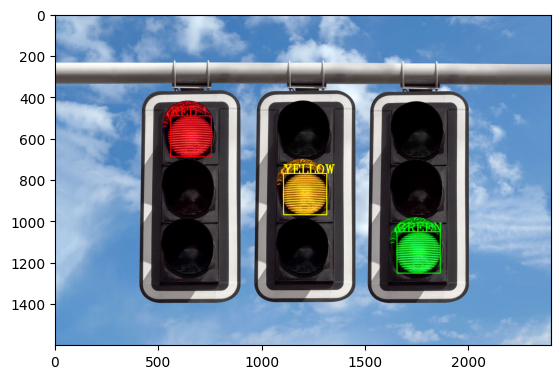

In [2]:
detect_redSignal(image)
detect_yellowSignal(image)
detect_greenSignal(image)



used case 02

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Load an image or video for testing
image = cv.imread('single traffic_light_01.jpg')

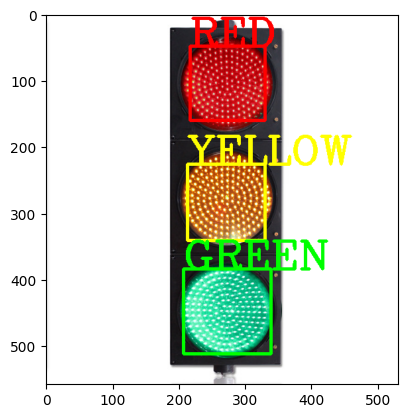

In [4]:
detect_redSignal(image)
detect_yellowSignal(image)
detect_greenSignal(image)

## Use Case 02

In [5]:
# Load an image or video for testing
image = cv.imread('single traffic_light.jpg')

Red Color Is Not Detected


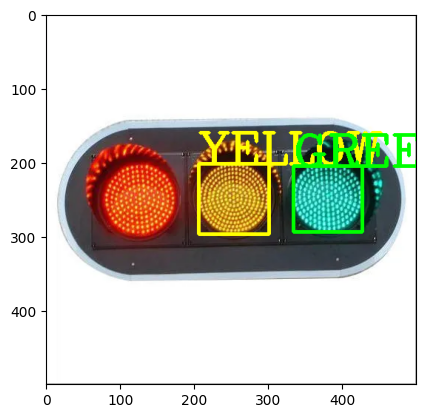

In [6]:
detect_redSignal(image)
detect_yellowSignal(image)
detect_greenSignal(image)